#  <font color='pink'>Kimeera Moodley - 1835687
Baby Cry Recognition Implementation </font>

In [398]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## <font color='green'>Imports of some important Libraries </font>

In [399]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [400]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 Librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems


## <font color='green'>Difference in librosa and scipy of audio file readint reading </font>

In [401]:
filename = '/content/drive/MyDrive/BabyCryFiles/hungry /fa8620d3-e7db-4101-aff0-28dbf0d96a5f-1429973911232-1.7-m-04-hu.wav'

In [402]:
import IPython.display as ipd
import librosa
import librosa.display
from scipy.io import wavfile as wav

In [403]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)

<Figure size 1008x360 with 0 Axes>

In [404]:
wavsamprate,wavaudio = wav.read(filename)

In [405]:
print("Sample rate represented by librosa:",sample_rate)
print()
print("Sample rate represented by scipy:",wavsamprate)

Sample rate represented by librosa: 22050

Sample rate represented by scipy: 8000


In [406]:
print("Audio wav file representation by librosa:\n",data)
print()
print("Audio wav file representation by scipy:\n",wavaudio)

Audio wav file representation by librosa:
 [ 0.          0.          0.         ... -0.00238474 -0.0018882
 -0.00099852]

Audio wav file representation by scipy:
 [  0   0   0 ... -40 -48 -80]


##  <font color='green'>Comparison of the two modules for audio reading and representation</font>
Sampling rate - number of samples of audio recorded every second
Librosa conducts more sampling than scipy and so data represented by librosa will be more accurate.
The representation of the audio files also differs as librosa implements normalisation. This normalisation is used for improving accuracies and not giving biases to specific variables.

## <font color='green'>Different Cry Types and Data Preprocessing</font>


### Belly pain cry

In [407]:
belly_pain = '/content/drive/MyDrive/BabyCryFiles/belly pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431159262344-1.7-m-04-bp.wav'

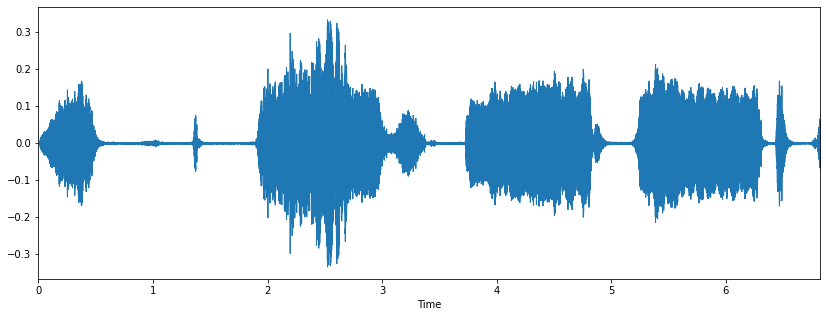

In [408]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(belly_pain)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(belly_pain)

### Burping cry

In [409]:
burping = '/content/drive/MyDrive/BabyCryFiles/burping/af30880e-5f98-4dc0-b37a-be6b21fa0ba3-1431240072536-1.7-m-26-bu.wav'

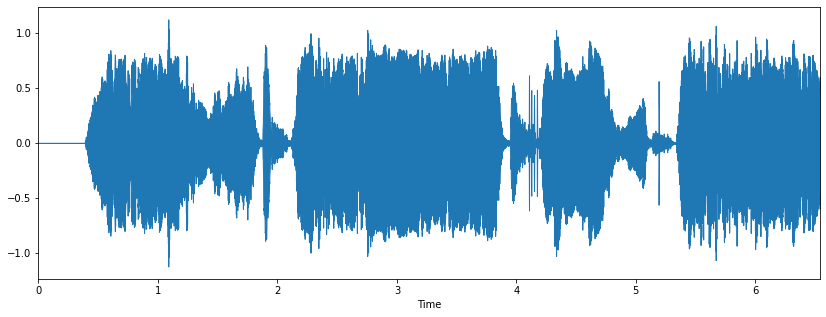

In [410]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(burping)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(burping)

### Discomfort cry 

In [411]:
discomfort = '/content/drive/MyDrive/BabyCryFiles/discomfort/837fd072-8704-4196-9ff1-1d2c07886e55-1432429478471-1.7-m-22-dc.wav'

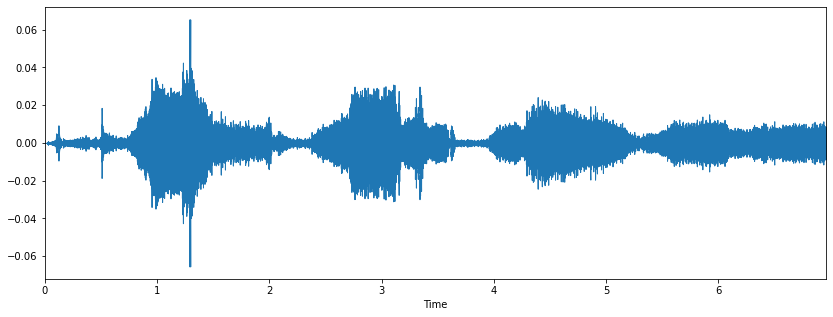

In [412]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(discomfort)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(discomfort)

### Hungry cry 

In [413]:
hungry = '/content/drive/MyDrive/BabyCryFiles/hungry /3bb2445a-9ae9-4dc8-9a2e-86c696ffa405-1430124221551-1.7-m-26-hu.wav'

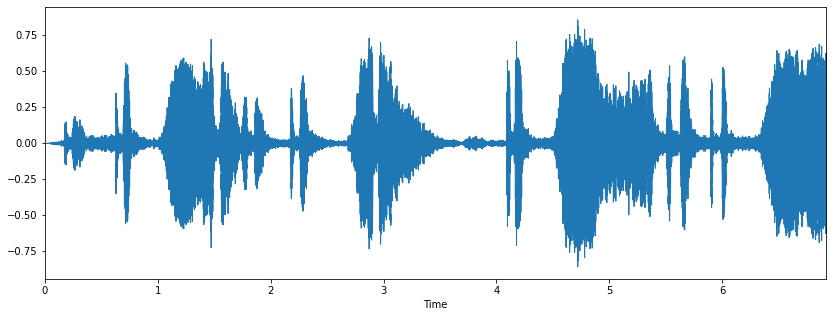

In [414]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(hungry)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(hungry)

### Tired cry

In [415]:
tired = '/content/drive/MyDrive/BabyCryFiles/tired/C421C6FE-DFEE-4080-8AEA-848E7CE4756B-1430548393-1.0-f-26-ti.wav'

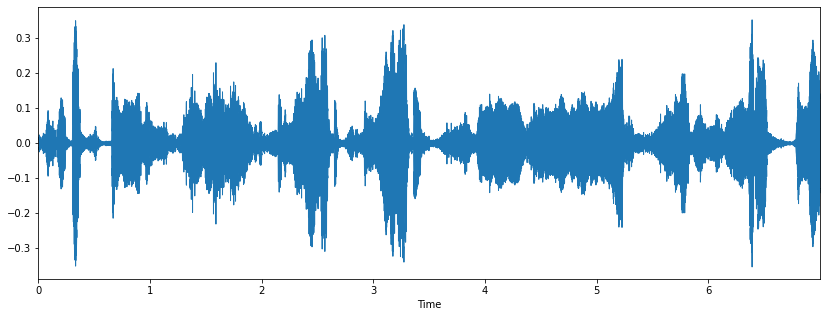

In [416]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(tired)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(tired)

In [417]:
# Original shape of the data collected for this research

In [418]:
dset = pd.read_csv("/content/drive/MyDrive/BabyCryFiles/data.csv")
dset.shape

(457, 4)

# Extract Features from audio samples using MFCC(Mel-Frequency Cepstral Coefficients) on original dataset

In [419]:
mfccs = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40).T
print(mfccs.shape)

(302, 40)


In [420]:
mfccs

array([[-4.0006140e+02,  1.6878648e+02, -2.9998068e+01, ...,
         4.0385771e+00,  5.0771627e+00, -1.5533016e+00],
       [-4.1215085e+02,  1.6330417e+02, -2.4567230e+01, ...,
        -1.1452508e-01,  1.3109310e+00, -4.9578393e-01],
       [-4.0725848e+02,  1.6480627e+02, -3.6078972e+01, ...,
        -5.0302534e+00, -2.1626329e+00,  3.2628231e+00],
       ...,
       [-2.7671143e+02,  1.9351784e+02, -1.4167773e+02, ...,
        -1.0429699e+01, -9.1468906e+00,  1.8542976e+00],
       [-2.8171210e+02,  1.8489087e+02, -1.2093588e+02, ...,
        -1.7497011e+01, -1.1012791e+01,  1.3362194e+01],
       [-2.1428844e+02,  1.5778221e+02, -7.6023293e+01, ...,
        -1.4885151e+01, -6.8590536e+00,  1.4723516e+01]], dtype=float32)

In [421]:
auddsetpath = '/content/drive/MyDrive/BabyCryFiles/' #after MyDrive just use BabyCryFiles/ to access data 

In [422]:
# Extracts the mfcc from a sound and provides 40 mfcc's for each audio file
def feature_extractor(file):
    audio,sampleRate = librosa.load(file)

    mfccs_features = librosa.feature.mfcc(y=audio,sr=sampleRate,n_mfcc=40)
    
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  
    return mfccs_scaled_features

In [423]:
# Conversion from a wav file to mfcc reprsentative #this just takes long to run
from tqdm import tqdm

extracted_features = []

for index_num,row in tqdm(dset.iterrows()):
    fname = os.path.join(os.path.abspath(auddsetpath),str(row["Folder"])+'/',str(row["FileName"]))
    final_label = row["ClassName"]
  
    data = feature_extractor(fname) #data is created here 
    extracted_features.append([data,final_label])
    

457it [01:46,  4.28it/s]


In [424]:
df = pd.DataFrame(extracted_features,columns=['feature','class'])
df.head()

,feature,class
0,"[-494.90518, 112.95291, -52.11973, -15.341589,...",belly pain
1,"[-499.59546, 153.07333, -55.393044, -4.3702416...",belly pain
2,"[-423.27338, 154.95966, -54.86138, -9.819554, ...",belly pain
3,"[-385.2419, 165.76239, -69.616646, -11.944189,...",belly pain
4,"[-313.35696, 173.14647, -64.95752, 1.1056671, ...",belly pain


In [425]:
df.shape

(457, 2)

In [426]:
x = np.array(df['feature'].tolist())
y = np.array(df['class'].tolist())

In [427]:
x.shape

(457, 40)

In [428]:
y.shape

(457,)

In [429]:
actual_data = pd.DataFrame(x)
actual_data['y'] = y
display(actual_data)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,y
0,-494.905182,112.952911,-52.119732,-15.341589,13.366138,-26.416368,-10.751534,7.974828,-11.675391,-5.960794,...,-1.991461,4.121545,6.196738,1.649715,1.330305,3.135531,-0.340892,-3.221105,-1.596585,belly pain
1,-499.595459,153.073334,-55.393044,-4.370242,16.093330,-32.238003,-5.655543,-3.315293,-27.269909,-3.285916,...,-3.854100,-3.865638,-0.043688,-2.242042,0.391117,1.293332,-0.901962,5.133459,5.815617,belly pain
2,-423.273376,154.959656,-54.861382,-9.819554,8.716018,-39.361435,-10.575691,-2.553573,-26.185085,-5.764549,...,-4.266123,-1.816408,0.990025,-3.165303,-0.949430,0.191352,-4.194109,-1.487027,0.354072,belly pain
3,-385.241913,165.762390,-69.616646,-11.944189,10.583400,-43.406353,-9.469235,-4.298606,-32.746300,-3.589526,...,-0.305784,2.311467,5.056397,-1.351204,0.335665,1.324917,-3.396539,1.008868,2.346212,belly pain
4,-313.356964,173.146469,-64.957520,1.105667,14.533069,-50.711777,-13.733780,-6.616469,-33.617077,-2.975460,...,-0.775530,3.436216,6.110881,-2.436147,0.499169,2.863269,-2.360431,1.255694,1.311379,belly pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-548.621399,85.922234,-52.442322,0.247390,28.906782,-16.865667,-7.277197,7.136522,-10.205340,-0.746205,...,-0.593467,-0.581101,1.489366,-0.426331,-1.146776,1.238884,0.420620,-0.419882,0.612349,tired
453,-381.295227,62.363678,-67.813400,-25.629498,3.473864,-22.072529,-0.048770,14.002920,-4.798902,-0.213321,...,-0.874678,-2.507172,0.887733,-0.794939,-0.633412,2.179145,-1.244984,-4.022947,-1.029331,tired
454,-327.179596,97.790733,-101.517448,-36.563442,4.032903,-25.859665,5.263141,4.781590,-15.551469,11.572062,...,-2.057267,-3.931250,-0.063914,-1.567914,1.025657,2.436101,-0.817464,1.063991,1.011498,tired
455,-331.852997,146.080933,-112.642532,-4.407917,18.193247,-60.706291,3.094160,23.359531,-29.782812,-3.841541,...,-2.867510,-2.119225,1.420406,-0.766225,1.969428,1.824140,-1.308731,2.290488,1.976637,tired


This is the final dataset passed to the models

# Balancing Technique: Oversampling

In [430]:
import tensorflow as tf
print(tf.__version__)

2.9.2


Tensorflow is the framework of choice for the models we build

In [431]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models, losses
from sklearn import metrics

Accuracy was chosen as the metric to measure as the report consists of accuracy calculations

In [432]:
tmpdset = dset #############################################
tmpdset.head() #displaying first 5 rows of dataset

,FileName,Folder,ClassID,ClassName
0,549a46d8-9c84-430e-ade8-97eae2bef787-143013077...,belly pain,0,belly pain
1,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...,belly pain,0,belly pain
2,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...,belly pain,0,belly pain
3,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain
4,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...,belly pain,0,belly pain


In [433]:
#store dataset into a list 
from tqdm import tqdm
audio_data = list()
for index_num,row in tqdm(dset.iterrows()):
    fname = os.path.join(os.path.abspath(auddsetpath),str(row["Folder"])+'/',str(row["FileName"]))
    audio_data.append(librosa.load(fname))

457it [01:14,  6.09it/s]


In [434]:
#adds audio waves and sample rate to the dataset above
audio_data = np.array(audio_data)
tmpdset['audio_waves'] = audio_data[:,0]
tmpdset['samplerate'] = audio_data[:,1]
tmpdset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


,FileName,Folder,ClassID,ClassName,audio_waves,samplerate
0,549a46d8-9c84-430e-ade8-97eae2bef787-143013077...,belly pain,0,belly pain,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...,belly pain,0,belly pain,"[3.285031e-05, 0.00020739679, 0.00029929247, 0...",22050
2,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...,belly pain,0,belly pain,"[-0.0012163238, -0.0013915803, -0.0011859963, ...",22050
3,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain,"[-0.00034356388, -0.0008007776, -0.0007815566,...",22050
4,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...,belly pain,0,belly pain,"[0.004349323, 0.002163908, -0.0021576288, -0.0...",22050


In [435]:
# bit lengths per audio and length of the respective audio sound added to the dataset
bit_lengths = list()
for i in range(tmpdset.shape[0]):
    bit_lengths.append(len(tmpdset['audio_waves'].iloc[i]))
bit_lengths = np.array(bit_lengths)
tmpdset['bit_lengths'] = bit_lengths
tmpdset['seconds_length'] = tmpdset['bit_lengths']/tmpdset['samplerate']
tmpdset.head()

,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
0,549a46d8-9c84-430e-ade8-97eae2bef787-143013077...,belly pain,0,belly pain,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,151263,6.86
1,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013849...,belly pain,0,belly pain,"[3.285031e-05, 0.00020739679, 0.00029929247, 0...",22050,154350,7.0
2,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013850...,belly pain,0,belly pain,"[-0.0012163238, -0.0013915803, -0.0011859963, ...",22050,154350,7.0
3,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013851...,belly pain,0,belly pain,"[-0.00034356388, -0.0008007776, -0.0007815566,...",22050,154350,7.0
4,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013852...,belly pain,0,belly pain,"[0.004349323, 0.002163908, -0.0021576288, -0.0...",22050,154350,7.0


In [436]:
tmpdset = tmpdset.sample(frac=1).reset_index(drop=True)
tmpdset.head()

,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
0,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013853...,belly pain,0,belly pain,"[0.0015254365, 0.0012713965, -1.3027004e-05, -...",22050,154350,7.0
1,c6fd9d60-0fa7-44c0-b3ce-0192527d7b81-142997827...,hungry,3,hungry,"[1.4802503e-06, 8.1664245e-07, -8.3492654e-07,...",22050,149499,6.78
2,ed31b187-34af-4ff1-979c-3b8a5905fb7b-143004480...,hungry,3,hungry,"[1.4802503e-06, 8.1664245e-07, -8.3492654e-07,...",22050,146412,6.64
3,e37c323c-0edb-4942-be47-3cc0b2de00a1-143439291...,hungry,3,hungry,"[1.4802503e-06, 8.1664245e-07, -8.3492654e-07,...",22050,151704,6.88
4,B456CE9D-CBD4-43E5-899B-8B8B0483F17D-143101548...,hungry,3,hungry,"[0.0009406483, 0.0011522514, 0.0010318268, 0.0...",22050,154350,7.0


In [437]:
hungryData = tmpdset[tmpdset.ClassName=='hungry']
tmpdset = tmpdset.drop(tmpdset[tmpdset.ClassName == 'hungry'].index)
display(tmpdset.head())
display(hungryData.head())

,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
0,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013853...,belly pain,0,belly pain,"[0.0015254365, 0.0012713965, -1.3027004e-05, -...",22050,154350,7.0
13,837fd072-8704-4196-9ff1-1d2c07886e55-143242947...,discomfort,2,discomfort,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,153468,6.96
14,b4c460d8-bd6b-4017-9bb8-2ae4ff0c5af1-143041826...,tired,4,tired,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,152586,6.92
17,d6cda191-4962-4308-9a36-46d5648a95ed-143116188...,discomfort,2,discomfort,"[-5.1816673e-10, -4.344033e-09, -4.3675876e-09...",22050,150822,6.84
28,643D64AD-B711-469A-AF69-55C0D5D3E30F-143013859...,belly pain,0,belly pain,"[0.0007696532, 0.0008262015, 0.00056586607, 0....",22050,154350,7.0


,FileName,Folder,ClassID,ClassName,audio_waves,samplerate,bit_lengths,seconds_length
1,c6fd9d60-0fa7-44c0-b3ce-0192527d7b81-142997827...,hungry,3,hungry,"[1.4802503e-06, 8.1664245e-07, -8.3492654e-07,...",22050,149499,6.78
2,ed31b187-34af-4ff1-979c-3b8a5905fb7b-143004480...,hungry,3,hungry,"[1.4802503e-06, 8.1664245e-07, -8.3492654e-07,...",22050,146412,6.64
3,e37c323c-0edb-4942-be47-3cc0b2de00a1-143439291...,hungry,3,hungry,"[1.4802503e-06, 8.1664245e-07, -8.3492654e-07,...",22050,151704,6.88
4,B456CE9D-CBD4-43E5-899B-8B8B0483F17D-143101548...,hungry,3,hungry,"[0.0009406483, 0.0011522514, 0.0010318268, 0.0...",22050,154350,7.0
5,fa8620d3-e7db-4101-aff0-28dbf0d96a5f-143446548...,hungry,3,hungry,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,149058,6.76


In [438]:
print(hungryData.seconds_length.max())

7.06


In [439]:
print(tmpdset.seconds_length.max())

7.06


In [440]:
minHungrybits = np.min(hungryData['bit_lengths'])
print(minHungrybits)
minHungryseconds = np.min(hungryData['seconds_length'])
print(minHungryseconds)

143766
6.52


In [441]:
mbits = np.min(tmpdset['bit_lengths'])
print(mbits)
mseconds = np.min(tmpdset['seconds_length'])
print(mseconds)

143766
6.52


The above cells split the dataset into 2 datasets.
The one is a dataset containing only hungry cries while the other contains cries from the 4 other cries

In [442]:
num_samples = 6000

#oversampling for cries = [0,1,2,3]
generated_audio_waves = list()

generated_audio_labels = list()

for i in tqdm(range(num_samples)):

    try:
        #index = np.random.choice(cries)
        #d = tmpdset[tmpdset.ClassID==index]
        chosen_file = np.random.choice(tmpdset['FileName'].values)
        #print(chosen_file)
        chosen_initial = np.random.choice(np.arange(0,tmpdset[tmpdset['FileName']==chosen_file]['bit_lengths'].values-mbits))
        generated_audio_waves.append(tmpdset[tmpdset['FileName']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+mbits])
        
        generated_audio_labels.append(tmpdset[tmpdset['FileName']==chosen_file]['ClassName'].values)
    except ValueError:
        continue
for j in tqdm(range(hungryData.shape[0]*5)):
    try:
            k = j%hungryData.shape[0]
            chosen_file = hungryData.iloc[k].FileName
            #print(chosen_file)
            chosen_initial = np.random.choice(np.arange(0,hungryData[hungryData['FileName']==chosen_file]['bit_lengths'].values-mbits))
            generated_audio_waves.append(hungryData[hungryData['FileName']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+mbits])

            generated_audio_labels.append(hungryData[hungryData['FileName']==chosen_file]['ClassName'].values)
    except ValueError:
        continue
        
generated_audio_waves = np.array(generated_audio_waves)

generated_audio_labels = np.array(generated_audio_labels)

100%|██████████| 1910/1910 [00:04<00:00, 432.73it/s]


The original dataset with 457 samples with mainly hungry cries is created into a new dataset with dataset +- 7000 samples and is more balanced than the original one to use in models for more accurate outcomes and reduced overfitting. 
Process: take random sample from the dataset that doesn't contain hungry cries and choose a random timeframe from that sample and then making this a new sample and is done 6000 times. 
The hungry cries are dealt with differently. Each sample is taken from the hungry cries dataset and a random timeframe from that sample is taken to be the actual sample and this is done 4 times for each hungry cry.
The above 2 processes provide a dataset sufficient enough for better prediction as it is more balanced and contains a lot more data.

In [443]:
generated_audio_waves.shape

(7831, 143766)

In [444]:
np.unique(generated_audio_labels,return_counts=True)

(array(['belly pain', 'burping', 'discomfort', 'hungry', 'tired'],
       dtype=object), array([1292,  701, 2148, 1905, 1785]))

# Extracting Features from audio samples using MFCC(Mel-Frequency Cepstral Coefficients) for updated dataset

In [445]:
!pip install python_speech_features 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [446]:
#conversion from a wav file to mfcc representative,40 mfccs are used per audio sample
mfcc_features = list()
for i in tqdm(range(len(generated_audio_waves))):
    mfcc_features.append(librosa.feature.mfcc(y=generated_audio_waves[i],n_mfcc=40).T)
mfcc_features = np.array(mfcc_features)

100%|██████████| 7831/7831 [03:35<00:00, 36.28it/s]


In [447]:
#getting shape of the mfcc dataset and the number of samples 
print(mfcc_features.shape)
print(np.unique(generated_audio_labels,return_counts=True))

(7831, 281, 40)
(array(['belly pain', 'burping', 'discomfort', 'hungry', 'tired'],
      dtype=object), array([1292,  701, 2148, 1905, 1785]))


In [448]:
# perform some pre processing on the labels for the mfcc dataset generated above
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(generated_audio_labels)
label_encoded = label_encoded[:, np.newaxis]
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [449]:
print(np.unique(label_encoded,return_counts=True))

(array([0, 1, 2, 3, 4]), array([1292,  701, 2148, 1905, 1785]))


## Splitting data into training and testing set and preparing it for the CNN models 

In [450]:
# Here we split the above dataset into training and testing with an 80:20 split, making sure to stratify on y so the sets are true representatives of the mfcc dataset
from sklearn.model_selection import train_test_split
x = mfcc_features
y = generated_audio_labels
x = (x-x.min())/(x.max()-x.min())
xtrain, xtest, ytrain, ytest = train_test_split(x, label_encoded, test_size=0.2,stratify=y)

In [451]:
print(np.unique(ytest))

[0 1 2 3 4]


In [452]:
ytrain = np.array(pd.get_dummies(ytrain[:,0]))
ytest = np.array(pd.get_dummies(ytest[:,0]))

In [453]:
xtrain.shape

(6264, 281, 40)

In [454]:
input_shape = (xtrain.shape[1], xtrain.shape[2], 1)

In [455]:
#reshaping inputs and outputs of the data for input into models
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1)
print(xtrain.shape)

xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1)
print(xtest.shape)

print(ytest.shape)

(6264, 281, 40, 1)
(1567, 281, 40, 1)
(1567, 5)


# Implementation of the CNN Models & Results
-LeNet-5

-VGG-13

-VGG-13 (improved)

## LeNet-5 CNN Model


In [456]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=input_shape))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 277, 36, 6)        156       
                                                                 
 average_pooling2d_8 (Averag  (None, 138, 18, 6)       0         
 ePooling2D)                                                     
                                                                 
 activation_8 (Activation)   (None, 138, 18, 6)        0         
                                                                 
 conv2d_89 (Conv2D)          (None, 134, 14, 16)       2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 67, 7, 16)        0         
 ePooling2D)                                                     
                                                                 
 activation_9 (Activation)   (None, 67, 7, 16)       

In [457]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['accuracy'])

In [458]:
historylenet = model.fit(xtrain, ytrain, epochs=15) ##########################

Epoch 1/15
196/196 [==============================] - 2s 7ms/step - loss: 1.5815 - accuracy: 0.2553
Epoch 2/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5577 - accuracy: 0.2652
Epoch 3/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5552 - accuracy: 0.2664
Epoch 4/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5591 - accuracy: 0.2660
Epoch 5/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5561 - accuracy: 0.2743
Epoch 6/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5526 - accuracy: 0.2717
Epoch 7/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5536 - accuracy: 0.2743
Epoch 8/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5528 - accuracy: 0.2716
Epoch 9/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5522 - accuracy: 0.2743
Epoch 10/15
196/196 [==============================] - 1s 6ms/step - loss: 1.5522 - accuracy: 0.2743

In [459]:
test_loss,test_acc = model.evaluate(xtest,ytest,verbose=2)

49/49 - 0s - loss: 1.5502 - accuracy: 0.2744 - 346ms/epoch - 7ms/step


In [460]:
predictions = model.predict(xtest)

49/49 [==============================] - 0s 3ms/step


In [461]:
predictions = np.argmax(predictions, axis=1)
print(predictions)
final_y = ytest.copy()
final_y = one_hot_encoder.inverse_transform(final_y)
print(final_y)

[2 2 2 ... 2 2 2]
[[3]
 [4]
 [0]
 ...
 [2]
 [4]
 [3]]


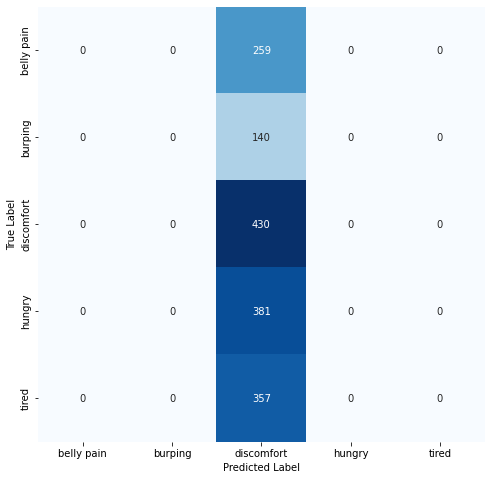

In [462]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(final_y, predictions)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The accuracy here is very low at a poor 27% indicating the model does very badly and as can be seen in the heatmap above many of the cries were misclassified 

## VGG-13 CNN Model 

In [463]:

from keras.models import load_model
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from sklearn.datasets import load_files   
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from glob import glob
from keras import applications
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [464]:
print(xtrain.shape[1:4])
print(ytest.shape)

(281, 40, 1)
(1567, 5)


In [465]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=input_shape, padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 281, 40, 64)       640       
                                                                 
 conv2d_92 (Conv2D)          (None, 281, 40, 64)       36928     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 140, 20, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 140, 20, 128)      49280     
                                                                 
 conv2d_94 (Conv2D)          (None, 140, 20, 128)      147584    
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 70, 10, 128)      0         
 g2D)                                                

In [466]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['accuracy'])

In [467]:
historyvgg13 = model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
196/196 [==============================] - 21s 103ms/step - loss: 1.5563 - accuracy: 0.2581
Epoch 2/5
196/196 [==============================] - 20s 103ms/step - loss: 1.5528 - accuracy: 0.2692
Epoch 3/5
196/196 [==============================] - 20s 104ms/step - loss: 1.5535 - accuracy: 0.2636
Epoch 4/5
196/196 [==============================] - 21s 105ms/step - loss: 1.5520 - accuracy: 0.2687
Epoch 5/5
196/196 [==============================] - 21s 105ms/step - loss: 1.5523 - accuracy: 0.2722


In [468]:
test_loss,test_acc = model.evaluate(xtest,ytest,verbose=2)

49/49 - 2s - loss: 1.5497 - accuracy: 0.2744 - 2s/epoch - 40ms/step


In [469]:
predictions = model.predict(xtest)

49/49 [==============================] - 2s 35ms/step


In [470]:
predictions = np.argmax(predictions, axis=1)
print(predictions)
final_y = ytest.copy()
final_y = one_hot_encoder.inverse_transform(final_y)
print(final_y)

[2 2 2 ... 2 2 2]
[[3]
 [4]
 [0]
 ...
 [2]
 [4]
 [3]]


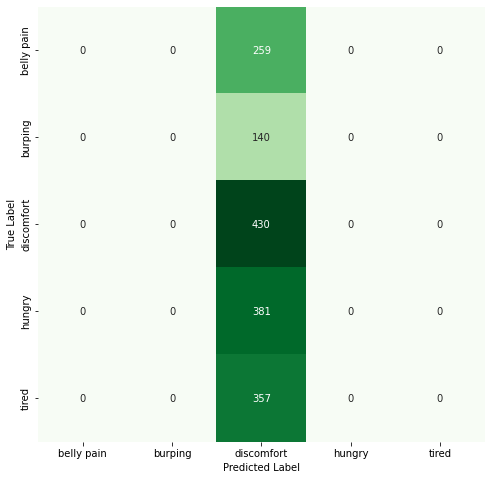

In [471]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(final_y, predictions)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [472]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## VGG-13 improvement

In [473]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5)) #dropout reduces overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax')) # 5represents number of classes 
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 281, 40, 32)       320       
                                                                 
 conv2d_102 (Conv2D)         (None, 281, 40, 32)       9248      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 140, 20, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 140, 20, 64)       18496     
                                                                 
 conv2d_104 (Conv2D)         (None, 140, 20, 64)       36928     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 70, 10, 64)       0         
 g2D)                                                

In [474]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['accuracy'])

In [475]:
history = model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
196/196 [==============================] - 7s 34ms/step - loss: 1.5618 - accuracy: 0.2682
Epoch 2/5
196/196 [==============================] - 7s 34ms/step - loss: 1.5528 - accuracy: 0.2727
Epoch 3/5
196/196 [==============================] - 7s 34ms/step - loss: 1.5506 - accuracy: 0.2743
Epoch 4/5
196/196 [==============================] - 7s 34ms/step - loss: 1.5519 - accuracy: 0.2743
Epoch 5/5
196/196 [==============================] - 7s 34ms/step - loss: 1.5513 - accuracy: 0.2706


In [476]:
test_loss,test_acc = model.evaluate(xtest,ytest,verbose=2)

49/49 - 1s - loss: 1.5509 - accuracy: 0.2744 - 822ms/epoch - 17ms/step


In [477]:
predictions = model.predict(xtest)

49/49 [==============================] - 1s 12ms/step


In [478]:
predictions = np.argmax(predictions, axis=1)
print(predictions)
final_y = ytest.copy()
final_y = one_hot_encoder.inverse_transform(final_y)
print(final_y)

[2 2 2 ... 2 2 2]
[[3]
 [4]
 [0]
 ...
 [2]
 [4]
 [3]]


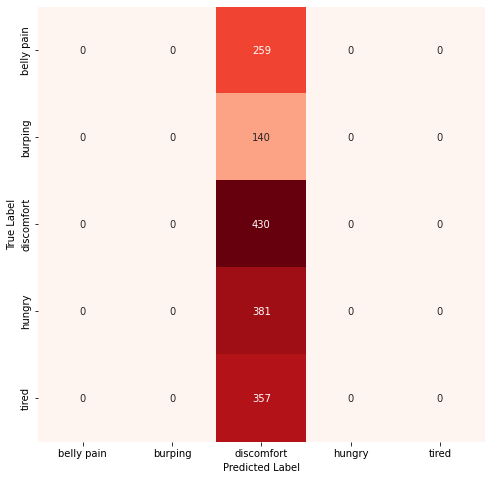

In [479]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(final_y, predictions)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The above two models follow the same process that was adopted to run the original CNN model, where we specify the architecture followed by compiling and summarising the model and lastly fitting the model. A similar approach was taken in coding all these models following a general CNN model however the convolutional layers differ. The models accuracy was given and the results were then depicted in a confusion matrix describing the accuracy of the predictions.